<a href="https://colab.research.google.com/github/vn322/RUDN_Lab_Works/blob/main/SQL_lab_2_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://metanit.com/sql/tutorial


## 16.03.2024


# **Проектирование**

Для качественного проектирования базы данных существуют различные методики, различные последовательности шагов или этапов, которые во многом похожи. И в целом мы можем выделить следующие этапы:



1.   Выделение сущностей и их атрибутов, которые будут храниться в базе данных, и формирование по ним таблиц. Атомизация сложных атрибутов на более простые.

2.   Определение уникальных идентификаторов (первичных ключей) объектов, которые хранятся в строках таблицы

3.  Определение отношений между таблицами с помощью внешних ключей

4.  Нормализация базы данных

## **Сущность (entity)**
Сущность (entity) представляет тип объектов, которые должны храниться в базе данных. Каждая таблица в базе данных должна представлять одну сущность. Как правило, сущности соответствуют объектам из реального мира.

У каждой сущности определяют набор **атрибутов**. Атрибут представляет свойство, которое описывает некоторую характеристику объекта.

Каждый столбец должен хранить один **атрибут** сущности. А каждая строка представляет отдельный объект или экземпляр сущности.



## **Восходящий и нисходящий подходы**




###**Восходящий**

При проектировании базы данных на этапе выделения сущностей и их атрибутов мы можем использовать два подхода: восходящий и нисходящий.

Восходящий подход предусматривает выделение необходимых атрибутов, которые надо сохранить в бд. Затем выделенные атрибуты группируются в сущности, для которых впоследствии создается таблицы. Такой подход больше подходит для проектирования небольших баз данных с небольшим количеством атрибутов.

Например, нам дана следующая информация:
Студент Иванов Иван Иванович посещает курс по математике, который преподает профессор Казанцев Олег Владимирович.

Студент Петоров Петр Петрович посещает курс по математике, которые преподает профессор Казанцев Олег Владимирович.

Студент Иванов Иван Иванович посещает курс по языку С++, который преподает ассистент Зайцев Валентин Евгеньевич.

Студент Васечкин Даниил Петрович посещает курс по алгоритмам, который преподает ассистент Зайцев Валентин Евгеньевич.

Студент Петоров Петр Петрович имеет следующие электронный адрес ppp@gmail.com и телефон +7-999-999-9999.


Какие данные из этой информации мы можем сохранить: имя студента, название курса, учебная должность преподавателя, имя преподавателя, электронный адрес студента.

Затем мы можем выполнить группировку по сущностям, к которым относятся эти данные:
В качестве сущьностей можно выделить **"Студент" "Преподаватель" "Курс"**

Для сущнотси **"Студент"** можно выделить следующие атрибуты:


*   Имя студента
*   Название курса
* Дата рождения студента
* Электронный адрес студента
*  Телефон студента



Для **"Преподаватель"**:

* Имя преподавателя

* Должность преподавателя
* Название курса

Для **"Курс"**:

* Название курса

* Имя студента

* Имя преподавателя


При этом мы вполне можем добавлять какие-то недостающие данные.

Также следует отметить, что какие-то данные могут иметь отношение к разным сущностям.

Например, курс хранит информацию о студенте, которые его посещает. А студент хранит информацию о посещаемом курсе. Подобная избыточность данных решается на последующих шагах проектирования в процессе нормализации базы данных.



### **Нисходящий подход.**
Но подобных атрибутов может оказаться очень много: сотни и даже тысячи. И в этом случае более оптимальным будет нисходящий подход. Данный подход подразумевает выявление сущностей. Затем происходит анализ сущностей, выявляются связи между ними, а потом и атрибуты сущностей.


То есть в данном случае мы могли бы сразу определить, что нам надо хранить данные по студентам, курсам и преподавателям. Затем в рамках каждой сущности выявить атрибуты

Например, у сущности "Студент" мы могли бы выделить такие атрибуты, как имя студента, его адрес, телефон, рост, вес, год его рождения. В тоже время нам надо учитывать не вообще все свойства, которые в принципе могут быть у сущности "Студент", а только те, которые имеют значение в рамках описываемой системы. Вряд ли в данном случае играют роль такие свойства как рост или вес студента, поэтому мы можем их вычеркнуть из списка атрибутов при проектировании таблицы.


Иногда подходы комбинируются. Для описания разных частей системы могут использоваться разные подходы. А затем их результаты объединяются.

## **Атомизация атрибутов**
При определении атрибутов происходит разделение сложных комплексных элементов на более простые. Так, в случае с именем студента мы можем его разбить на собственно имя и фамилию. Это позволит впоследствии выполнять операции с эти подэлементами отдельно, например, сортировать студентов только по фамилии.

То же самое касается адреса - мы можем сохранить весь адрес целиком, а можем разбить его на части - дом, улицу, город и т.д.

В то же время возможность разделения одного элемента на подэлементы не всегда может быть востребованной. В ряде задач это может быть просто не нужно. Выделять необходимо только те элементы, которые действительно нужны.

В соответствии с этим аспектом мы можем выделить у сущности **"Студент"** следующие атрибуты:
* имя студента
* фамилия студента
* год рождения
* город, улица
* дом
* телефон.

## **Диапазон значений (Домен)**
Каждый атрибут имеет домен (domain). Домен представляет набор допустимых значений для одного или нескольких атрибутов. По сути домен определяет смысл и источник значений, которые могут иметь атрибуты.

Домены могут отличаться для разных атрибутов, но также несколько атрибутов могут иметь один домен.

Например, выше были определены атрибуты сущности **"Студент"**. Определим используемые домены:

* Имя. Домен представляет все возможные имена, которые могут использоваться. Каждое имя представляет строку длиной максимум 20 символов (маловероятно, что нам могут встретиться имена свыше 20 символов).

* Фамилия. Домен представляет все возможные фамилии, которые могут использоваться. Каждая фамилия представляет строку длиной максимум 20 символов.

* Год рождения. Домен представляет все года рождения. Каждый год является числовым значением от 1950 до 2017.

* Город. Домен представляет все города текущей страны. Каждый город представляет строку длиной максимум 50 символов.

* Улица. Домен представляет все улицы текущей страны. Каждая улица представляет строку длиной максимум 50 символов.

* Дом. Домен представляет все возможные номера домов. Каждый номер дома является числом от 1 до, скажем, 10000.

* Телефон. Домен представляет все возможные телефонные номера. Каждый номер является строкой длиной в 11 символов.

Определяя домен, мы сразу видим, какие данные и каких типов будут хранить атрибуты. Какое-то другое значение, которое не соответствует домену, атрибут иметь не может.

В примере выше каждый атрибут имеет свой домен. Но, домены могут совпадать. Например, если бы сущность содержала бы следующие два атрибута: город рождения и город проживания, то домен бы совпадал и был бы одним и тем же для обоих атрибутов.

## **Определитель NULL**
При определении атрибутов и их домена необходимо проанализировать, а может ли у атрибута отсутствовать значение. Определитель NULL позволяет задать отсутствие значения. Например, в примере выше у студента обязательно должно быть какое-либо имя, поэтому недопустима ситуация, когда у атрибута, который представляет имя, отсутствует значение.

В то же время студент может не иметь телефонного номера или в рамках системы телефон не обязателен. Поэтому на этапе проектирования таблицы можно указать, что данный атрибут позволяет значение NULL.

Как правило, большинство современных реляционных СУБД поддерживают определитель NULL и позволяют задать его допустимость для столбца таблицы.

## **Ключи**

Ключи представляют способ идентификации строк в таблице. С помощью ключей мы также можем связывать строки между различными таблицами в отношения.

### **Суперключ**

Superkey (суперключ) - комбинация атрибутов (столбцов), которые уникально идентифицируют каждую строку таблицы. Это могут быть и все столбцы, и несколько и и один. При этом строки, которые содержат значения этих атрибутов, не должны повторяться.

Например, у нас есть сущность Student, которая представляет данные о пользователях и которая имеет следующие атрибуты:

* FirstName (имя)

* LastName (фамилия)

* Year (год рождения)

* Phone (номер телефона)

Какие атрибуты в данном случае могут составлять суперключ:

* {FirstName, LastName, Year, Phone}

* {FirstName, Year, Phone}

* {LastName, Year, Phone}

* {FirstName, Phone}

* {LastName, Phone}

* {Year, Phone}

* {Phone}

Каждого студента уникально может идентифицировать телефонный номер, поэтому любые наборы, в которых встречается атрибут Phone, представляют суперключ.

А вот, к примеру, набор {FirstName, LastName, Year} не является суперключом, так как у нас теоретически могут быть как минимум два студента с одинаковыми именем, фамилией и годом рождения.

### **Потенциальный ключ**
Candidate key (потенциальный ключ) - представляет собой минимальный суперключ отношения (таблицы), то есть набор атрибутов, который удовлетворяет ряду условий:

* Неприводимость: он не может быть сокращен, он содержит минимально возможный набор атрибутов

* Уникальность: он должен иметь уникальные значения вне зависимости от изменения строки

* Наличие значения: он не должен иметь значения NULL, то есть он обязательно должен иметь значение.

Возьмем ранее выделенные суперключи и найдем среди них candidate key. Первый пять суперключей не соответствуют первому условию, так как все их можно сократить до суперключа {Phone}:

* {FirstName, LastName, Year, Phone}

* {FirstName, Year, Phone}

* {LastName, Year, Phone}

* {FirstName, Phone}

* {LastName, Phone}

* {Year, Phone}

Суперключ {Phone} соответствует первому и второму условию, так как он имеет уникальное значение (в данном случае все пользователи могут иметь только уникальные телефонные номера). Но соответствует ли он третьему условию? В целом нет, так как теоретически студент может и не иметь телефона. В этом случае атрибут Phone будет иметь значение NULL, то есть значение будет отсутствовать.

В то же время это может зависеть от ситуации. Если в какой-то систему номер телефона является неотъемлемым атрибутом, например, используется для регистрации и входа в систему, то его можно считать потенциальным ключом. Но в данном случае мы рассматриваем общую ситуацию. И для понимания потенциального ключа необходимо отталкиваться от конкретной системы, которую описывает база данных.

И в таком случае суперключи таблицы не содержат потенциального ключа.

### **Первичный ключ**
Первичный ключ (primary key) непосредственно применяется для идентификации строк в таблице. Он должен соответствовать следующим ограничениям:

1.  **Первичный ключ должен быть уникальным все время**

2.  **Он должен постоянно присутствовать в таблице и иметь значение**

3.  **Он не должен часто менять свое значение. В идеале он вообще не должен изменять значение.**

Как правило, первичный ключ представляет один столбец таблицы, но также может быть составным и состоять из нескольких столбцов.

Если для таблицы можно выделить потенциальный ключ, то его можно использовать в качестве первичного ключа.

Если же потенциальные ключи отсутствуют, то для первичного ключа можно добавить к сущности специальный атрибут, который, как правило, называется, Id или имеет форму [Имя_сущности]Id (например, StudentId), либо может иметь другое название. И обычно данный атрибут принимает целочисленное значение, начиная с 1.

Если же у нас есть несколько потенциальных ключей, то те потенциальные ключи, которые не составляют первичный ключ, являются альтернативными ключами (alternative key).

Например, возьмем представление пользователей на сайтах с двухфакторной авторизацией, где нам обязательно иметь электронный адрес, который нередко выступает в качестве логина, и какой-нибудь номер телефона. В этом случае таблицу пользователей мы можем задать с помощью следующих атрибутов:

* Name (имя пользователя)

* Email (электронный адрес)

* Password (пароль)

* Phone (телефонный номер)

В данном случае атрибуты **Email** и **Phone** являются потенциальными ключами, они обязательны в рамках рассматриваемой системы и в принципе уникальны. И теоретически, мы можем использовать один из этих атрибутов в качестве первичного ключа, тогда второй будет альтернативным ключом. Однако опять же поскольку теоретически значения обоих атрибутов могут меняться, то лучше все таки определить дополнительный атрибут специально под первичный ключ.

## **Внешние ключи и связи**

### **Связь (relationship)**
Базы данных могут содержать таблицы, которые связаны между собой различными связями. Связь (relationship) представляет ассоциацию между сущностями разных типов.


При выделении связи выделяют главную или родительскую таблицу (primary key table / master table) и зависимую, дочернюю таблицу (foreign key table / child table). Дочерняя таблица зависит от родительской.

Для организации связи используются внешние ключи. Внешний ключ представляет один или несколько столбцов из одной таблицы, который одновременно является потенциальным ключом из другой таблицы. Внешний ключ необязательно должен соответствовать первичному ключу из главной таблицы. Хотя, как правило, внешний ключ из зависимой таблицы указывает на первичный ключ из главной таблицы.

Связи между таблицами бывают следующих типов:

* Один к одному (One to one)

* Один к многим (One to many)

* Многие ко многим (Many to many)

### **Связь один к одному**
Данный тип связей встречает не часто. В этом случае объекту одной сущности можно сопоставить только один объект другой сущности. Например, на некоторых сайтах пользователь может иметь только один блог. То есть возникает отношение один пользователь - один блог.

Нередко этот тип связей предполагает разбиение одной большой таблицы на несколько маленьких. Основная родительская таблица в этом случае продолжает содержать часто используемые данные, а дочерняя зависимая таблица обычно хранит данные, которые используются реже.

В этом отношении первичный ключ зависимой таблицы в то же время является внешним ключом, который ссылается на первичный ключ из главной таблицы.

Например, таблица **Users** представляет пользователей и имеет следующие столбцы:

* UserId (идентификатор, первичный ключ)

* Name (имя пользователя)

И таблица Blogs представляет блоги пользователей и имеет следующие столбцы:

* BlogId (идентификатор, первичный и внешний ключ)

* Name (название блога)

В этом случае столбец **BlogId** будет хранить значение из столбца **UserId** из таблицы пользователей. То есть столбец **BlogId** будет выступать одновременно первичным и внешним ключом.
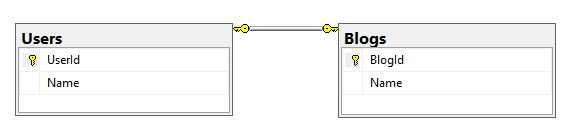

### **Связь один ко многим**
Это наиболее часто встречаемый тип связей. В этом типе связей несколько строк из дочерний таблицы зависят от одной строки в родительской таблице. Например, в одном блоге может быть несколько статей. В этом случае таблица блогов является родительской, а таблица статей - дочерней. То есть один блог - много статей. Или другой пример, в футбольной команде может играть несколько футболистов. И в то же время один футболист одновременно может играть только в одной команде. То есть одна команда - много футболистов.

К примеру, пусть будет таблица **Articles**, которая представляет статьи блога и которая имеет следующие столбцы:

* ArticleId (идентификатор, первичный ключ)

* BlogId (внешний ключ)

* Title (название статьи)

* Text (текст статьи)

В этом случае столбец **BlogId** из таблицы статей будет хранить значение из столбца **BlogId** из таблицы блогов.

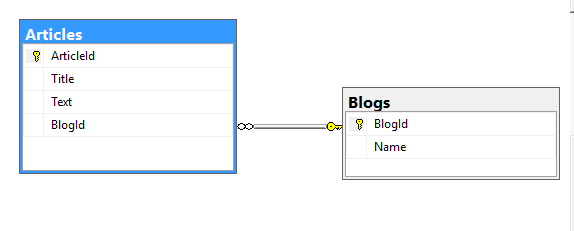

### **Связь многие ко многим**

При этом типе связей одна строка из таблицы А может быть связана с множеством строк из таблицы В. В свою очередь одна строка из таблицы В может быть связана с множеством строк из таблицы А. Типичный пример - студенты и курсы: один студент может посещать несколько курсов, и соответственно на один курс могут записаться несколько студентов.

Другой пример - статьи и теги: для одной статьи можно определить несколько тегов, а один тег может быть определен для нескольких статей.

Но в SQL Server на уровне базы данных мы не можем установить прямую связь многие ко многим между двумя таблицами. Это делается посредством вспомогательной промежуточной таблицы. Иногда данные из этой промежуточной таблицы представляют отдельную сущность.

Например, в случае со статьями и тегами пусть будет таблица **Tags**, которая имеет два столбца:

*  TagId (идентификатор, первичный ключ)

* Text (текст тега)


Также пусть будет промежуточная таблица **ArticleTags** со следующими полями:

* TagId (идентификатор, первичный и внешний ключ)

* ArticleIdId (идентификатор, первичный и внешний ключ)

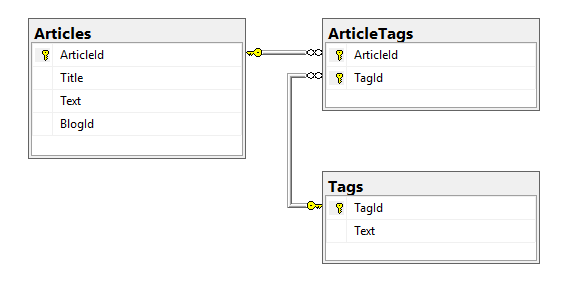

Технически мы получим две связи один-ко-многим. Столбец TagId из таблицы ArticleTags будет ссылаться на столбец TagId из таблицы Tags. А столбец ArticleId из таблицы ArticleTags будет ссылаться на столбец ArticleId из таблицы Articles. То есть столбцы TagId и ArticleId в таблице ArticleTags представляют составной первичный ключ и одновременно являются внешними ключами для связи с таблицами Articles и Tags.

## **Ссылочная целостность данных**
При изменении первичных и внешних ключей следует соблюдать такой аспект как ссылочная целостность данных (referential integrity). Ее основная идея состоит в том, чтобы две таблице в базе данных, которые хранят одни и те же данные, поддерживали их согласованность. Целостность данных представляет правильно выстроенные отношения между таблицами с корректной установкой ссылок между ними. В каких случаях целостность данных может нарушаться:

* Аномалия удаления (deletion anomaly). Возникает при удалении строки из главной таблицы. В этом случае внешний ключ из зависимой таблицы продолжает ссылаться на удаленную строку из главной таблицы

* Аномалия вставки (insertion anomaly). Возникает при вставке строки в зависимую таблицу. В этом случае внешний ключ из зависимой таблицы не соответствует первичному ключу ни одной из строк из главной таблицы.

* Аномалии обновления (update anomaly). При подобной аномалии несколько строк одной таблицы могут содержать данные, которые принадлежат одному и тому же объекту. При изменении данных в одной строке они могу прийти в противоречие с данными из другой строки.

### **Аномалия удаления**
Для решения аномалии удаления для внешнего ключа следует устанавливать одно из двух ограничений:

* Если строка из зависимой таблицы обязательно требует наличия строки из главной таблицы, то для внешнего ключа устанавливается каскадное удаление. То есть при удалении строки из главной таблицы происходит удаление связанной строки (строк) из зависимой таблицы.

* Если строка из зависимой таблицы допускает отсутствие связи со строкой из главной таблицы (то есть такая связь необязательна), то для внешнего ключа при удалении связанной строки из главной таблицы задается установка значения NULL. При этом столбец внешнего ключа должен допускать значение NULL.

### **Аномалия вставки**
Для решения аномалии вставки при добавлении в зависимую таблицу данных столбец, который представляет внешний ключ, должен допускать значение NULL. И таким образом, если добавляемый объект не имеет связи с главной таблицей, то в столбце внешнего ключа будет стоять значение NULL.

### **Аномалии обновления**
Для решения проблемы аномалии обновления применяется нормализация

#**Задания**

##**Задание 1**

Предположим, что необходимо спроектировать схему базы данных для поиска соискателей на работу.
Так же, предположим, что уже известно (после анализа предметной области и требований), что для сотрудников из компании, которые ищут кандидатов, важно знать:

для HR:

1.1)  компании, где работал соискатель

1.2)   позиции, которые ранее занимал соискатель в данных компаниях

1.3) навыки и умения, которыми соискатель пользовался в работе;

а также продолжительность работы соискателя в каждой компании на каждой позиции и длительность использования каждого навыка и умения


для технического специалиста:

2.1) позиции, которые занимал соискатель в данных компаниях

2.2) навыки и умения, которыми соискатель пользовался в работе

2.3) проекты, в которых участвовал соискатель;
а также продолжительность работы соискателя на каждой позиции и в каждом проекте, длительность использования каждого навыка и умения

Опишите:

1.   Какие сущьности необходимо использованть
2.  Какие необходимы таблицы
3.  Какие поля будут запроектирвоанные в этих таблицах
4.   Какие связи должны быть установлены между этими полями?



Для начала выявим нужные [сущности](https://habr.com/ru/articles/514364/):

Сотрудник (Employee)

Компания (Company)

Позиция (должность) (Position)

Проект (Project)

Навык (Skill)

Компании и сотрудники относятся как многие ко многим, так как сотрудник мог работать в нескольких компаниях, а в компании работают многие люди.
Аналогично относятся позиции и сотрудники: несколько сотрудников могут занимать одну позицию как в рамках как одной, так и нескольких компаний.
С другой стороны, сотрудник мог работать на разных позициях как в рамках одной, так разных компаний. Таким образом, отношение между позициями и компаниями — многие ко многим.

Аналогично и по проектам: проекты относятся ко всем выше рассмотренным сущностям как многие ко многим.
Для простоты будем считать, что в проекте сотрудник использует один набор навыков.

Тогда проекты и навык относятся как многие ко многим.

Поскольку  важно зафиксировать, как долго сотрудник работал на той или иной позиции в той или иной компании, а также на каждом проекте, схема  базы данных может быть следующей:

## **Задание 2**
Нарисуйте схему этой БД и связи между полями.

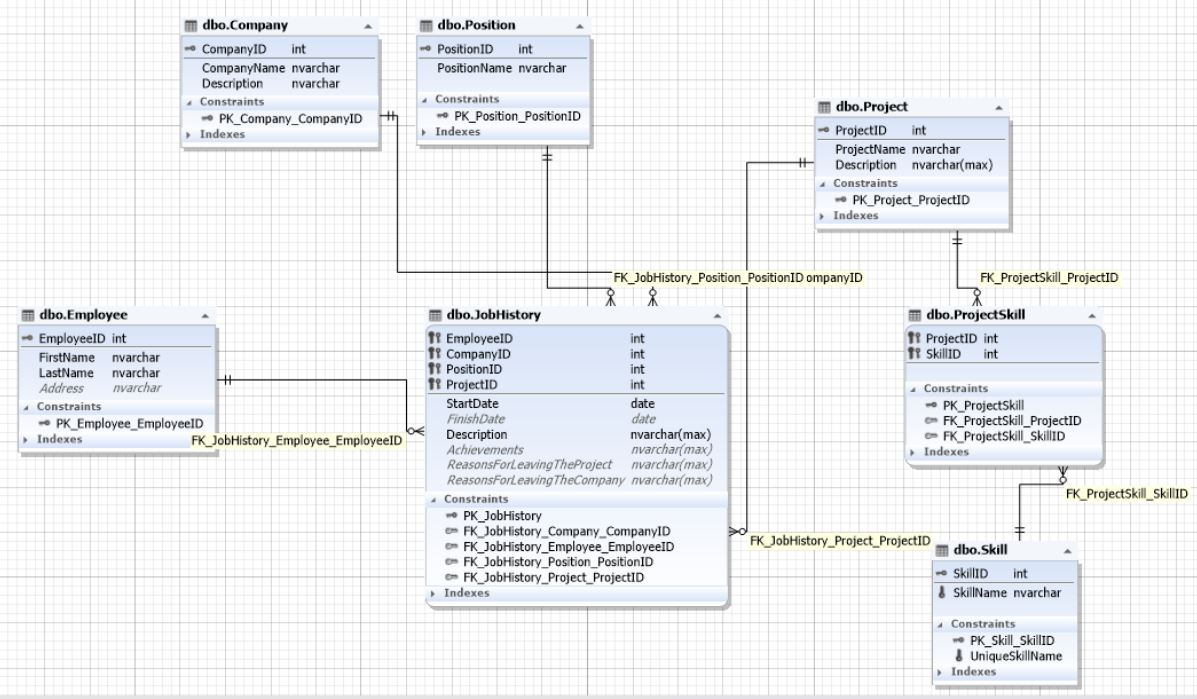

Здесь таблица JobHistory выступает как сущность истории работы каждого соискателя. То есть, это резюме, которое педставляет отношения многие ко многим между сущностями сотрудник, компания, позиция и проект.

Проекты и навыки относятся друг другу как многие ко многим и потому связываются между собой через сущность (таблицу) ProjectSkill.

Здесь можно  упростить схему добавления данных, если «навыки» вложить в сущность «проекты» через неполно структурированные данные (NoSQL) в виде XML, JSON или просто перечислять названия навыков через точку с запятой. Но это бы усложнило выборку с группировкой по навыкам и фильтрацию по отдельным навыкам.

Подобная модель лежит в основе базы данных проекта [Geecko](https://geecko.ru/).

## **Задание 3**

Напишите запросы формируюущие БД, изображенную на следущей схеме:

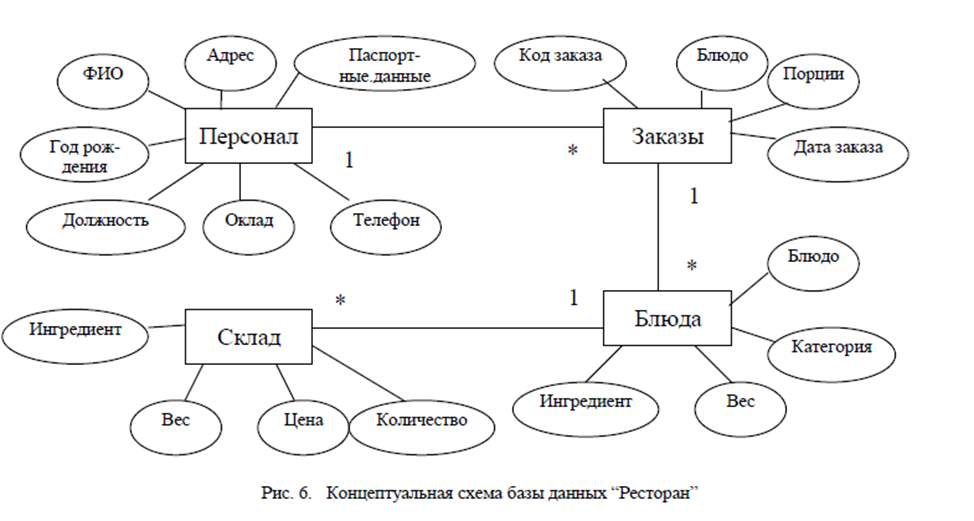

In [ ]:
!pip install sqlalchemy

In [ ]:
!pip install sqlalchemy_schemadisplay

In [ ]:
import pandas as pd
from sqlalchemy_schemadisplay import create_schema_graph
from sqlalchemy import Table, Column, Integer, BigInteger, Float, String, MetaData, ForeignKey, Date
from sqlalchemy import create_engine

# create engine
engine = create_engine('sqlite:///tttx.sqlite', echo=True)

# Initiate Metadata
metadata = MetaData()

# create table DDLs ....

stuff = Table('stuff', metadata,
    Column('name', String(50), primary_key=True),
    Column('born', Date, nullable=False, unique=False),
    Column('addres', Integer, nullable=False, unique=False),
    Column('salary', Float, nullable=False, unique=False),
    Column('passport', Integer, nullable=False, unique=True),
    Column('telefon', Integer, nullable=False, unique=False),
    Column('position', String(20), nullable=False, unique=False),
)

order = Table('order', metadata,
    Column('cod', Integer, primary_key=True),
    Column('name', String(50), ForeignKey("stuff.name")),
    Column('customer', String(50), ForeignKey("stuff.name")),
    Column('dish', String(30), ForeignKey("meal.dish")),
    Column('number', Integer, nullable=False, unique=False),
    Column('date', Date, nullable=False, unique=False),
)


meal = Table('meal', metadata,
    Column('dish', String(30), nullable=False, unique=False),
    Column('category', String(30), nullable=False, unique=False),
    Column('weight', Float, nullable=True, unique=False),
    Column('ingredient', String(30), ForeignKey("stock.ingredient")),

)

stock = Table('stock', metadata,
    Column('ingredient', String(30), primary_key=True),
    Column('weight', Float, nullable=True, unique=False),
    Column('price', Float, nullable=False, unique=False),
    Column('number', Integer, nullable=False, unique=False),
)

# create the tables
# metadata.create_all(engine)

# create the pydot graph object by autoloading all tables via a bound metadata object
graph = create_schema_graph(metadata=metadata,
   show_datatypes=True, # The image would get nasty big if we'd show the datatypes
   show_indexes=False, # ditto for indexes
   #rankdir='LR', # From left to right (instead of top to bottom)
   concentrate=True, # Don't try to join the relation lines together
    engine=engine
)
graph.write_png('dbschema.png') # write out the file


2024-03-23 11:15:08,556 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2024-03-23 11:15:08,559 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


INFO:sqlalchemy.engine.Engine:SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


2024-03-23 11:15:08,562 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-03-23 11:15:08,566 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_temp_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


INFO:sqlalchemy.engine.Engine:SELECT name FROM sqlite_temp_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


2024-03-23 11:15:08,568 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-03-23 11:15:08,570 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


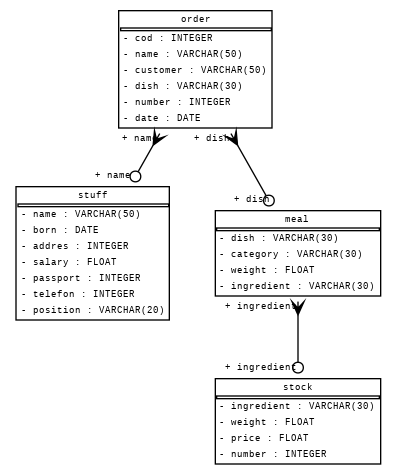

In [ ]:
from IPython.display import Image
Image(filename='dbschema.png')

## Table creation

In [1]:
import sqlite3

In [2]:
try:
    sqlite_connection = sqlite3.connect('restaurant.db')
    cursor = sqlite_connection.cursor()
    print("База данных создана и успешно подключена к SQLite")

    sqlite_select_query = "select sqlite_version();" #создается запрос для получения версии базы данны
    cursor.execute(sqlite_select_query)
    record = cursor.fetchall()
    print("Версия базы данных SQLite: ", record)
    cursor.close()

except sqlite3.Error as error:
    print("Ошибка при подключении к sqlite", error)
finally:
    if (sqlite_connection):
        sqlite_connection.close()
        print("Соединение с SQLite закрыто")

База данных создана и успешно подключена к SQLite
Версия базы данных SQLite:  [('3.37.2',)]
Соединение с SQLite закрыто


## Table - Stuff

In [3]:
import sqlite3

try:
    sqlite_connection = sqlite3.connect('restaurant.db')
    sqlite_create_table_query = '''CREATE TABLE stuff (
                                name TEXT  PRIMARY KEY,
                                born datetime,
                                addres INTEGERL,
                                salary REAL,
                                passport INTEGER,
                                telefon INTEGER,
                                position TEXT
                                );'''

    cursor = sqlite_connection.cursor()
    print("База данных подключена к SQLite")
    cursor.execute(sqlite_create_table_query)
    sqlite_connection.commit()
    print("Таблица SQLite создана")

    cursor.close()

except sqlite3.Error as error:
    print("Ошибка при подключении к sqlite", error)
finally:
    if (sqlite_connection):
        sqlite_connection.close()
        print("Соединение с SQLite закрыто")

База данных подключена к SQLite
Таблица SQLite создана
Соединение с SQLite закрыто


In [4]:
import sqlite3
import traceback
import sys

try:
    sqlite_connection = sqlite3.connect('restaurant.db')
    cursor = sqlite_connection.cursor()
    print("База данных подключена к SQLite")

    sqlite_insert_query = """INSERT INTO stuff (name, born, addres, salary)
                            VALUES ('АnriDU', 2002, 22, 1000),

                                    ('SergER', 2003, 19, 800),

                                    ('HomerYT', 1993, 19, 800),

                                    ('RimTY', 1993, 19, 800),

                                    ('DanAS', 1952, 26, 1100),

                                    ('FredRT', 1951, 18, 1500)"""

    count = cursor.execute(sqlite_insert_query)
    sqlite_connection.commit()
    print("Запись успешно вставлена ​​в таблицу sqlitedb_developers ", cursor.rowcount)
    cursor.close()

except sqlite3.Error as error:
    print("Не удалось вставить данные в таблицу sqlite")
    print("Класс исключения: ", error.__class__)
    print("Исключение", error.args)
    print("Печать подробноcтей исключения SQLite: ")
    exc_type, exc_value, exc_tb = sys.exc_info()
    print(traceback.format_exception(exc_type, exc_value, exc_tb))
finally:
    if (sqlite_connection):
        sqlite_connection.close()
        print("Соединение с SQLite закрыто")

База данных подключена к SQLite
Запись успешно вставлена ​​в таблицу sqlitedb_developers  6
Соединение с SQLite закрыто


In [5]:
import sqlite3

# Устанавливаем соединение с базой данных
connection = sqlite3.connect('restaurant.db')
cursor = connection.cursor()

# Выбираем всех  игроков
cursor.execute('SELECT * FROM stuff')
users = cursor.fetchall()

# Выводим результаты
for name in users:
  print(name)

# Закрываем соединение
connection.close()

('АnriDU', 2002, 22, 1000.0, None, None, None)
('SergER', 2003, 19, 800.0, None, None, None)
('HomerYT', 1993, 19, 800.0, None, None, None)
('RimTY', 1993, 19, 800.0, None, None, None)
('DanAS', 1952, 26, 1100.0, None, None, None)
('FredRT', 1951, 18, 1500.0, None, None, None)


## Table - Order

In [6]:
import sqlite3

try:
    sqlite_connection = sqlite3.connect('restaurant.db')
    sqlite_create_table_query = '''CREATE TABLE orde (
                                cod INTEGER  PRIMARY KEY,
                                name TEXT,
                                customer TEXT,
                                dish TEXT,
                                number INTEGER,
                                date datetime
                                );'''

    cursor = sqlite_connection.cursor()
    print("База данных подключена к SQLite")
    cursor.execute(sqlite_create_table_query)
    cursor.execute("ALTER TABLE orde ADD FOREIGN KEY (name) REFERENCES stuff (name);")# Create foreign key
    sqlite_connection.commit()
    print("Таблица SQLite создана")

    cursor.close()

except sqlite3.Error as error:
    print("Ошибка при подключении к sqlite", error)
finally:
    if (sqlite_connection):
        sqlite_connection.close()
        print("Соединение с SQLite закрыто")

База данных подключена к SQLite
Ошибка при подключении к sqlite near "FOREIGN": syntax error
Соединение с SQLite закрыто


In [7]:
import sqlite3
import traceback
import sys

try:
    sqlite_connection = sqlite3.connect('restaurant.db')
    cursor = sqlite_connection.cursor()
    print("База данных подключена к SQLite")

    sqlite_insert_query = """INSERT INTO orde (name, customer, dish, number,date)
                            VALUES ('АDU', 'Alex', 'meat', 2, 2024),

                                    ('SER', 'Alex', 'bread', 2, 2024),

                                    ('HYT', 'Alex', 'fruit', 1, 2024),

                                    ('RTY', 'Bart', 'meat', 3, 2024),

                                    ('DAS', 'Bart', 'cheese', 5, 2024),

                                    ('SER', 'Col', 'bread', 1, 2024),

                                    ('HYT', 'Den', 'fruit', 3, 2024),

                                    ('RTY', 'Tom', 'meat', 3, 2024),

                                    ('DAS', 'Fred', 'cheese', 2, 2024),

                                    ('FRT', 'Col', 'vegetable', 4, 2024)"""

    count = cursor.execute(sqlite_insert_query)
    sqlite_connection.commit()
    print("Запись успешно вставлена ​​в таблицу sqlitedb_developers ", cursor.rowcount)
    cursor.close()

except sqlite3.Error as error:
    print("Не удалось вставить данные в таблицу sqlite")
    print("Класс исключения: ", error.__class__)
    print("Исключение", error.args)
    print("Печать подробноcтей исключения SQLite: ")
    exc_type, exc_value, exc_tb = sys.exc_info()
    print(traceback.format_exception(exc_type, exc_value, exc_tb))
finally:
    if (sqlite_connection):
        sqlite_connection.close()
        print("Соединение с SQLite закрыто")

База данных подключена к SQLite
Запись успешно вставлена ​​в таблицу sqlitedb_developers  10
Соединение с SQLite закрыто


In [8]:
import sqlite3

# Устанавливаем соединение с базой данных
connection = sqlite3.connect('restaurant.db')
cursor = connection.cursor()

# Выбираем всех  игроков
cursor.execute('SELECT * FROM orde')
users = cursor.fetchall()

# Выводим результаты
for name in users:
  print(name)

# Закрываем соединение
connection.close()

(1, 'АDU', 'Alex', 'meat', 2, 2024)
(2, 'SER', 'Alex', 'bread', 2, 2024)
(3, 'HYT', 'Alex', 'fruit', 1, 2024)
(4, 'RTY', 'Bart', 'meat', 3, 2024)
(5, 'DAS', 'Bart', 'cheese', 5, 2024)
(6, 'SER', 'Col', 'bread', 1, 2024)
(7, 'HYT', 'Den', 'fruit', 3, 2024)
(8, 'RTY', 'Tom', 'meat', 3, 2024)
(9, 'DAS', 'Fred', 'cheese', 2, 2024)
(10, 'FRT', 'Col', 'vegetable', 4, 2024)


## Table - Meal

In [9]:
import sqlite3

try:
    sqlite_connection = sqlite3.connect('restaurant.db')
    sqlite_create_table_query = '''CREATE TABLE meal (
                                dish TEXT  PRIMARY KEY,
                                category TEXT,
                                weight REAL,
                                ingredient TEXT
                                );'''

    cursor = sqlite_connection.cursor()
    print("База данных подключена к SQLite")
    cursor.execute(sqlite_create_table_query)
    sqlite_connection.commit()
    print("Таблица SQLite создана")

    cursor.close()

except sqlite3.Error as error:
    print("Ошибка при подключении к sqlite", error)
finally:
    if (sqlite_connection):
        sqlite_connection.close()
        print("Соединение с SQLite закрыто")

База данных подключена к SQLite
Таблица SQLite создана
Соединение с SQLite закрыто


In [10]:
import sqlite3
import traceback
import sys

try:
    sqlite_connection = sqlite3.connect('restaurant.db')
    cursor = sqlite_connection.cursor()
    print("База данных подключена к SQLite")

    sqlite_insert_query = """INSERT INTO meal (dish, weight, ingredient)
                            VALUES ('bread', 3, 'baget'),

                                    ('fruit', 5, 'apple'),

                                    ('meat', 4, 'beef'),

                                    ('cheese', 2, 'parm'),

                                    ('vegetable', 8, 'tomat')"""

    count = cursor.execute(sqlite_insert_query)
    sqlite_connection.commit()
    print("Запись успешно вставлена ​​в таблицу sqlitedb_developers ", cursor.rowcount)
    cursor.close()

except sqlite3.Error as error:
    print("Не удалось вставить данные в таблицу sqlite")
    print("Класс исключения: ", error.__class__)
    print("Исключение", error.args)
    print("Печать подробноcтей исключения SQLite: ")
    exc_type, exc_value, exc_tb = sys.exc_info()
    print(traceback.format_exception(exc_type, exc_value, exc_tb))
finally:
    if (sqlite_connection):
        sqlite_connection.close()
        print("Соединение с SQLite закрыто")

База данных подключена к SQLite
Запись успешно вставлена ​​в таблицу sqlitedb_developers  5
Соединение с SQLite закрыто


In [11]:
import sqlite3

# Устанавливаем соединение с базой данных
connection = sqlite3.connect('restaurant.db')
cursor = connection.cursor()

# Выбираем всех  игроков
cursor.execute('SELECT * FROM meal')
users = cursor.fetchall()

# Выводим результаты
for name in users:
  print(name)

# Закрываем соединение
connection.close()

('bread', None, 3.0, 'baget')
('fruit', None, 5.0, 'apple')
('meat', None, 4.0, 'beef')
('cheese', None, 2.0, 'parm')
('vegetable', None, 8.0, 'tomat')


## Table - Stock

In [12]:
import sqlite3

try:
    sqlite_connection = sqlite3.connect('restaurant.db')
    sqlite_create_table_query = '''CREATE TABLE stock (
                                ingredient TEXT  PRIMARY KEY,
                                weight REAL,
                                price REAL,
                                number INTEGER
                                );'''

    cursor = sqlite_connection.cursor()
    print("База данных подключена к SQLite")
    cursor.execute(sqlite_create_table_query)
    sqlite_connection.commit()
    print("Таблица SQLite создана")

    cursor.close()

except sqlite3.Error as error:
    print("Ошибка при подключении к sqlite", error)
finally:
    if (sqlite_connection):
        sqlite_connection.close()
        print("Соединение с SQLite закрыто")

База данных подключена к SQLite
Таблица SQLite создана
Соединение с SQLite закрыто


In [13]:
import sqlite3
import traceback
import sys

try:
    sqlite_connection = sqlite3.connect('restaurant.db')
    cursor = sqlite_connection.cursor()
    print("База данных подключена к SQLite")

    sqlite_insert_query = """INSERT INTO stock (ingredient, price)
                            VALUES ('baget', 2),

                                    ('apple', 3),

                                    ('beef', 8),

                                    ('parm', 7),

                                    ('tomat', 4)"""

    count = cursor.execute(sqlite_insert_query)
    sqlite_connection.commit()
    print("Запись успешно вставлена ​​в таблицу sqlitedb_developers ", cursor.rowcount)
    cursor.close()

except sqlite3.Error as error:
    print("Не удалось вставить данные в таблицу sqlite")
    print("Класс исключения: ", error.__class__)
    print("Исключение", error.args)
    print("Печать подробноcтей исключения SQLite: ")
    exc_type, exc_value, exc_tb = sys.exc_info()
    print(traceback.format_exception(exc_type, exc_value, exc_tb))
finally:
    if (sqlite_connection):
        sqlite_connection.close()
        print("Соединение с SQLite закрыто")

База данных подключена к SQLite
Запись успешно вставлена ​​в таблицу sqlitedb_developers  5
Соединение с SQLite закрыто


In [14]:
import sqlite3

# Устанавливаем соединение с базой данных
connection = sqlite3.connect('restaurant.db')
cursor = connection.cursor()

# Выбираем всех  игроков
cursor.execute('SELECT * FROM stock')
users = cursor.fetchall()

# Выводим результаты
for name in users:
  print(name)

# Закрываем соединение
connection.close()

('baget', None, 2.0, None)
('apple', None, 3.0, None)
('beef', None, 8.0, None)
('parm', None, 7.0, None)
('tomat', None, 4.0, None)


## **Задание 4**
Напишите запросы взовращающие:
1.  имена людей моложе 25 лет
2.  имена всех пенсионеров
3.  Название самое дорогого блюда
4.  Название самого дешевого блюда

5. имена людей сформировавших пять самых дорогих заказов
6. имена пятерых людей сформироваших заказы на самые большие суммы, сортировка по убыванию этих сумм

In [15]:
con = sqlite3.connect('restaurant.db')
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('stuff',), ('orde',), ('meal',), ('stock',)]


**имена людей моложе 25 лет**

In [16]:
import sqlite3

connection = sqlite3.connect('restaurant.db')
cursor = connection.cursor()


cursor.execute('SELECT name, born FROM stuff LEFT JOIN orde  USING (name) WHERE orde.date - stuff.born < 25')

results = cursor.fetchall()

for row in results:
  print(row)

connection.close()

**имена всех пенсионеров**

In [17]:
import sqlite3

connection = sqlite3.connect('restaurant.db')
cursor = connection.cursor()


cursor.execute('SELECT name, born FROM stuff LEFT JOIN orde  USING (name) WHERE orde.date - stuff.born > 65')

results = cursor.fetchall()

for row in results:
  print(row)

connection.close()

**Название самое дорогого блюда**

In [18]:
import sqlite3

connection = sqlite3.connect('restaurant.db')
cursor = connection.cursor()


cursor.execute('SELECT meal.dish, SUM(stock.price*meal.weight) as sum FROM meal, stock GROUP BY meal.dish ORDER BY sum DESC LIMIT 1')

results = cursor.fetchall()

for row in results:
  print(row)

connection.close()

('vegetable', 192.0)


**Название самого дешевого блюда**

In [19]:
import sqlite3

connection = sqlite3.connect('restaurant.db')
cursor = connection.cursor()


cursor.execute('SELECT meal.dish, SUM(stock.price*meal.weight) as sum FROM meal, stock GROUP BY meal.dish ORDER BY sum  LIMIT 1')

results = cursor.fetchall()

for row in results:
  print(row)

connection.close()

('cheese', 48.0)


**имена пятерых людей сформироваших заказы на самые большие суммы, сортировка по убыванию этих сумм**

In [20]:
import sqlite3

connection = sqlite3.connect('restaurant.db')
cursor = connection.cursor()


cursor.execute('SELECT orde.customer, SUM(stock.price*meal.weight) as sum FROM orde, meal, stock GROUP BY orde.dish ORDER BY sum DESC LIMIT 5')

results = cursor.fetchall()

for row in results:
  print(row)

connection.close()

('Alex', 1584.0)
('Alex', 1056.0)
('Bart', 1056.0)
('Alex', 1056.0)
('Col', 528.0)


**имена людей сформировавших пять самых дорогих заказов**

In [21]:
import sqlite3

connection = sqlite3.connect('restaurant.db')
cursor = connection.cursor()


cursor.execute('SELECT orde.customer, SUM(stock.price*meal.weight) as sum FROM orde, meal, stock GROUP BY orde.customer ORDER BY sum DESC LIMIT 5')

results = cursor.fetchall()

for row in results:
  print(row)

connection.close()

('Alex', 1584.0)
('Col', 1056.0)
('Bart', 1056.0)
('Tom', 528.0)
('Fred', 528.0)


# Misc

In [ ]:
stuff = Table('stuff', metadata,
    Column('name', String(50), primary_key=True),
    Column('born', Date, nullable=False, unique=False),
    Column('addres', Integer, nullable=False, unique=False),
    Column('salary', Float, nullable=False, unique=False),
    Column('passport', Integer, nullable=False, unique=True),
    Column('telefon', Integer, nullable=False, unique=False),
    Column('position', String(20), nullable=False, unique=False),
)

order = Table('order', metadata,
    Column('cod', Integer, primary_key=True),
    Column('name', String(50), ForeignKey("stuff.name")),
    Column('customer', String(50), ForeignKey("stuff.name")),
    Column('dish', String(30), ForeignKey("meal.dish")),
    Column('number', Integer, nullable=False, unique=False),
    Column('date', Date, nullable=False, unique=False),
)


meal = Table('meal', metadata,
    Column('dish', String(30), nullable=False, unique=False),
    Column('category', String(30), nullable=False, unique=False),
    Column('weight', Float, nullable=True, unique=False),
    Column('ingredient', String(30), ForeignKey("stock.ingredient")),

)

stock = Table('stock', metadata,
    Column('ingredient', String(30), primary_key=True),
    Column('weight', Float, nullable=True, unique=False),
    Column('price', Float, nullable=False, unique=False),
    Column('number', Integer, nullable=False, unique=False)),